In [1]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
# CSV dosyalarının okunması
exercise_data = pd.read_csv('./exercise.csv')
calories_data = pd.read_csv('./calories.csv')

# İlk 10 veriyi görüntüleme
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [3]:
# Verilerin birleştirilmesi
joined_data = exercise_data.join(calories_data.set_index('User_ID'), on='User_ID', how='left') # User_ID'ye göre birleştirme
joined_data.head(10) 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [4]:
# Cinsiyet sütununun sayısal değere dönüştürülmesi
joined_data['Gender'] = joined_data['Gender'].map({'male': 0, 'female': 1}) 

In [5]:
# Özellikler ve hedef değişkenin ayrılması
X = joined_data[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = joined_data['Calories'] 


In [6]:
# Verilerin eğitim ve test setlerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split fonksiyonu ile verileri %80 eğitim %20 test olarak ayırıyoruz.
# random_state parametresi ile verilerin karıştırılma şeklini belirliyoruz. 

#"42" sayısı genellikle yazılım ve veri bilimi topluluğunda mizahi bir referans olarak kullanılır. 
#Bu, Douglas Adams'ın "Otostopçunun Galaksi Rehberi" adlı bilim kurgu romanında, hayat, evren ve her şeye dair nihai cevabın 42 olduğuna dair bir referanstır.

In [7]:
# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler() # Standartlaştırma işlemi
X_train = scaler.fit_transform(X_train) # Eğitim seti üzerinde fit ve transform işlemi
# fit işlemi veri üzerinde öğrenme işlemi yapar.
# transform işlemi ise veriyi dönüştürür.
X_test = scaler.transform(X_test)
# Test seti üzerinde sadece transform işlemi yapılır.

In [8]:
# LightGBM regressor modelinin oluşturulması
model = lgb.LGBMRegressor()

# Modelin eğitilmesi
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 7
[LightGBM] [Info] Start training from score 89.095417


c:\Users\berktug\Documents\MachineLearningCaloriePrediction\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\berktug\Documents\MachineLearningCaloriePrediction\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


LGBMRegressor()

In [9]:
# Test seti üzerinde tahminler yapılması
y_pred = model.predict(X_test) #predict fonksiyonu ile tahmin yapılır. 

# Performans değerlendirmesi
lgb_mae = mean_absolute_error(y_test, y_pred) #mean_absolute_error fonksiyonu ile ortalama mutlak hata hesaplanır.
print(f'Mean Absolute Error (MAE): {lgb_mae}')

Mean Absolute Error (MAE): 1.2834486794591151


In [10]:
# XGBoost regressor modelinin oluşturulması
xgb_model = xgb.XGBRegressor()

In [11]:
# Modelin eğitilmesi
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
# Test seti üzerinde tahminler yapılması
xgb_y_pred = xgb_model.predict(X_test)

# Performans değerlendirmesi
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
print(f'XGBoost Mean Absolute Error (MAE): {xgb_mae}')

XGBoost Mean Absolute Error (MAE): 1.4981198125282924


In [13]:
# Performans karşılaştırması
print(f'LightGBM vs XGBoost MAE:\nLightGBM: {lgb_mae}\nXGBoost: {xgb_mae}')

LightGBM vs XGBoost MAE:
LightGBM: 1.2834486794591151
XGBoost: 1.4981198125282924


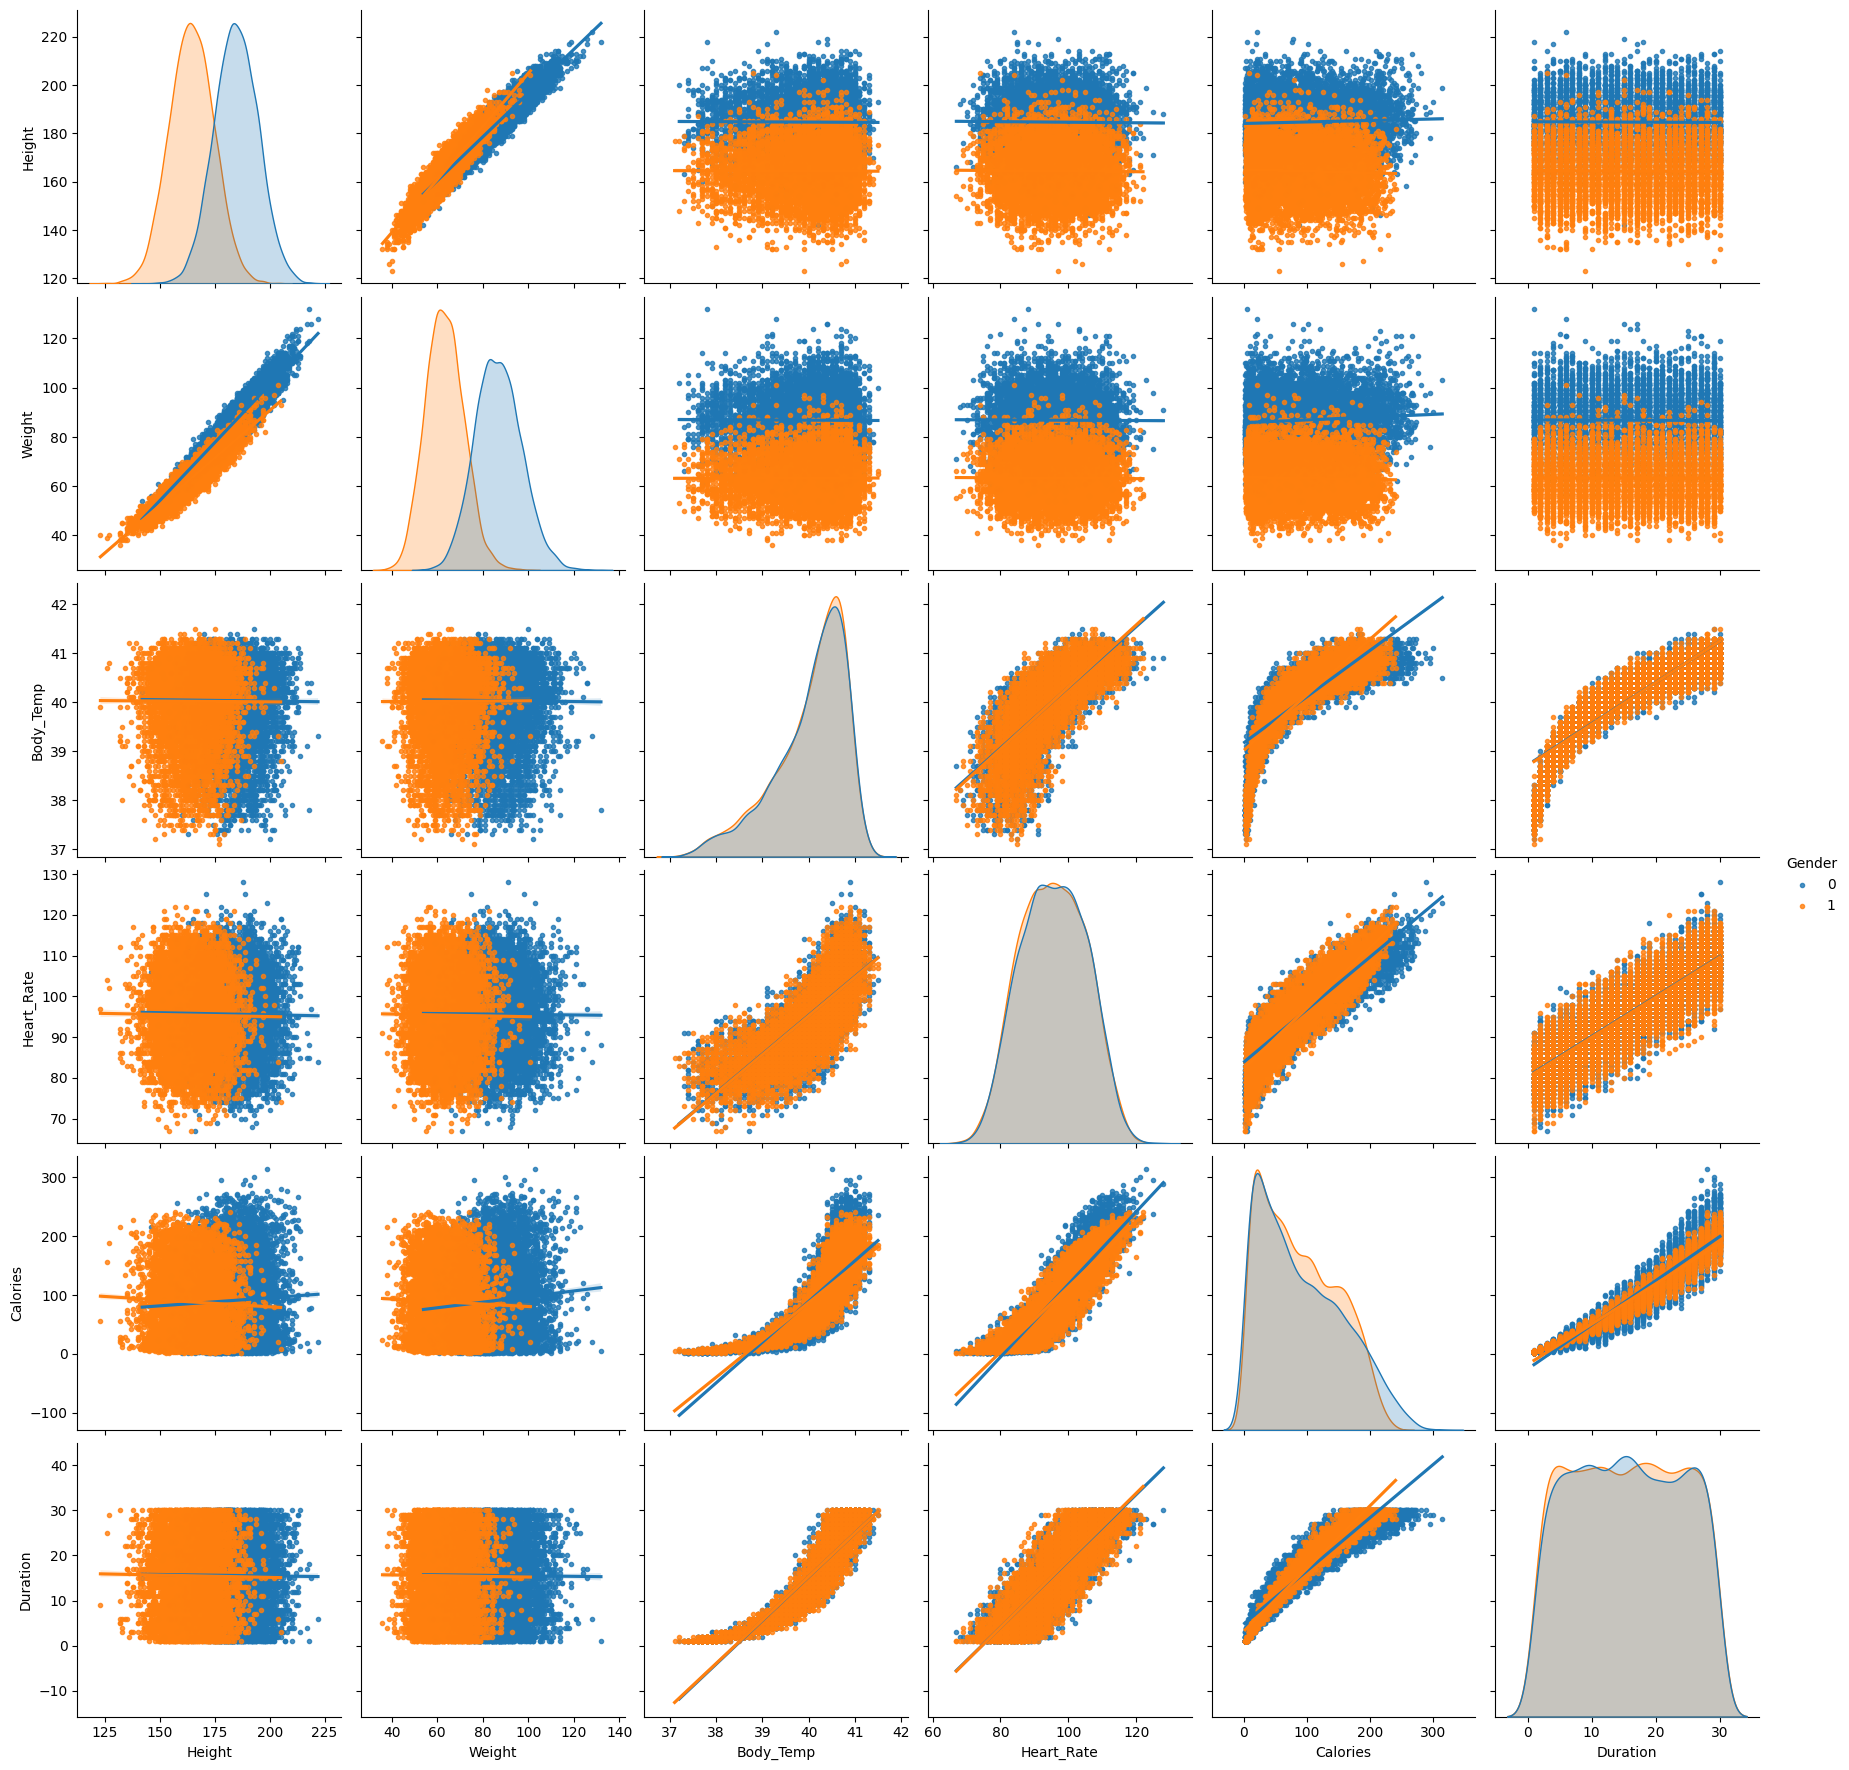

In [14]:
# Grafiklerin oluşturulması
cols = ["Height", "Weight", "Body_Temp", "Heart_Rate", "Calories", "Duration", "Gender"]
plot = sns.pairplot(joined_data[cols], height=3, markers=".", hue="Gender", kind="reg")

xlabels = []
for ax in plot.axes[-1, :]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)

y_ax_len = len(plot.axes[:, 0])
for i in range(len(xlabels)):
    for j in range(y_ax_len):
        if j != i:
            plot.axes[j, i].xaxis.set_label_text(xlabels[i])

plt.show()

# Cinsiyet Farklılıkları
 * Heart_Rate ve Calories: Erkeklerin kalp atış hızları ve yaktıkları kaloriler daha geniş bir dağılıma sahipken, kadınların bu değerleri daha dar bir dağılıma sahiptir.
    * Kalp Atış Hızı ve Kalori Yakımı (Geniş Dağılım): Erkeklerin kalp atış hızı ve yaktıkları kaloriler daha geniş bir dağılıma sahiptir. Bu, bazı erkeklerin çok yüksek veya çok düşük kalp atış hızlarına ve kalori yakımına sahip olabileceği anlamına gelir.

# Dağılımlar
 * Heart_Rate: Kalp atış hızları genel olarak benzerdir, ancak erkeklerde daha geniş bir dağılım gözlenmektedir.
    * Geniş bir dağılım, histogram veya kernel density plot gibi grafiklerde, tepe noktasının yayvan ve düşük olduğu, yani verilerin geniş bir aralığa yayıldığı şekilde görünür. Grafikte, kalp atış hızı değerlerinin 60 ile 120 arasında değiştiğini ve bu aralıkta yaygınlaştığını görebiliriz.
 * Calories: Kalori yakımı erkeklerde daha geniş bir dağılıma sahiptir.
    * Geniş bir dağılım, kalori yakımı değerlerinin daha geniş bir aralığa yayıldığı şekilde görünür. Grafikte, kalori yakım değerlerinin geniş bir aralıkta dağıldığını, bazı bireylerin düşük kalori yaktığını (örneğin 50-100 kalori) ve bazı bireylerin yüksek kalori yaktığını (örneğin 250-300 kalori) görebiliriz.
 * Duration: Egzersiz süresi dağılımı erkekler ve kadınlar için benzerdir.
    * Egzersiz süresi verilerinin belirli bir aralıkta yoğunlaştığını ve çoğu kişinin belirli bir süre egzersiz yaptığını gösterir.
